# Team Formation Application
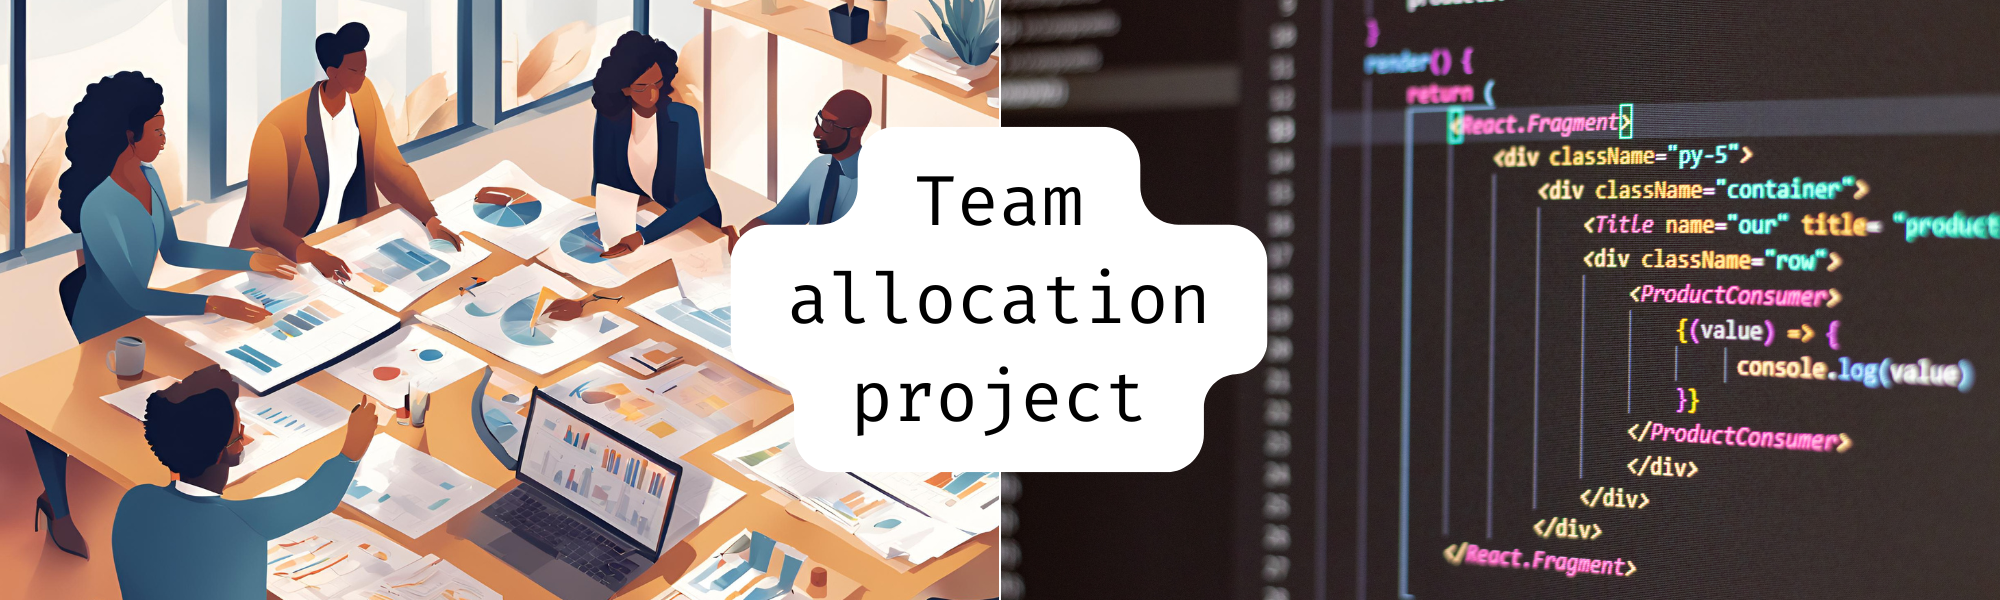

## Group 4
**Team members:**
1. Khanak Jindal (khanak001@e.ntu.edu.sg)
2. Iman Dzafir (Imandzaf001@e.ntu.edu.sg)
3. Li Tianze (TLI029@e.ntu.edu.sg) 
4. Crystal Nathasha (crystaln001@e.ntu.edu.sg)

# Introduction 
**Problem statement:** The "Introduction to Data Science" is a Year 1 course offered at NTU. Recently, the course has experienced a significant increase in enrollment, with 6,000 students registered. These students are organized into 120 tutorial groups, each consisting of 50 students. The course coordinator is facing challenges in efficiently forming teams of 5 for a mini-project component of the course.

You are provided with a csv file (records.csv) consist of 6,000 student records with their Tutorial Group, Student ID, Name, School, Gender, and CGPA. The application must ensure fairness and diversity when forming teams by considering the following factors:

1. School Affiliation: *To ensure a mix of knowledge and skills, no team should have a majority of students from the same school.*
2. Gender: *To promote gender diversity, no team should have a majority of students from the same gender.*
3. Current CGPA: *To balance academic performance, teams should not consist predominantly of students with very high or very low CGPAs.*

# records.csv data analysis

**Number of Students by School**
1. Maximum students are from CoB (NBS), EEE, and CCDS with about 800 students.
2. Minimum students are from LKCMedicine, ADM, and NIE with less than 200 students.
   
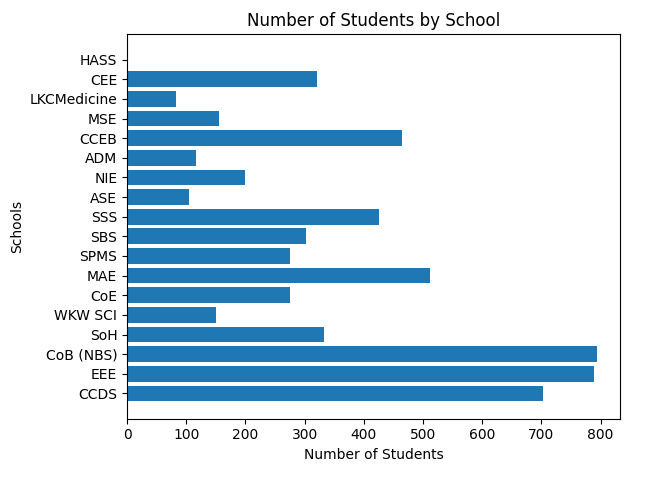

**Gender Distribution**
* The pie chart showcases the slight majority in the number of females, with 54% females and 46% males.

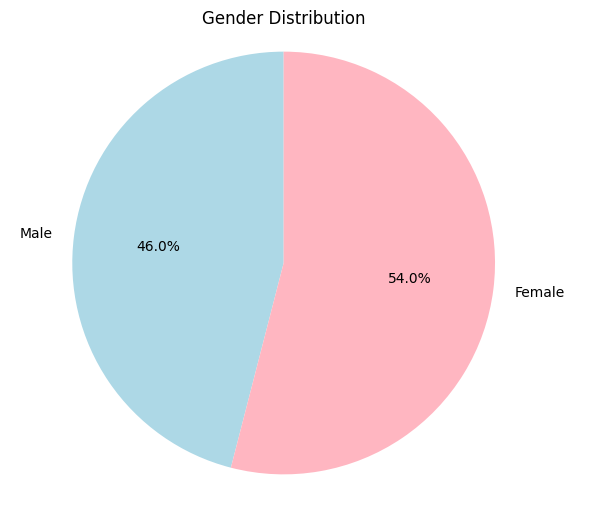

**CGPA Distribution**
1. The box plot showcases that most students have a CGPA between 4.0 and 4.2, with a median around 4.1.
2. This distribution suggests that most students are performing similarly, but we should be careful when forming teams to ensure teams don’t consist entirely of high or low CGPA students.
   
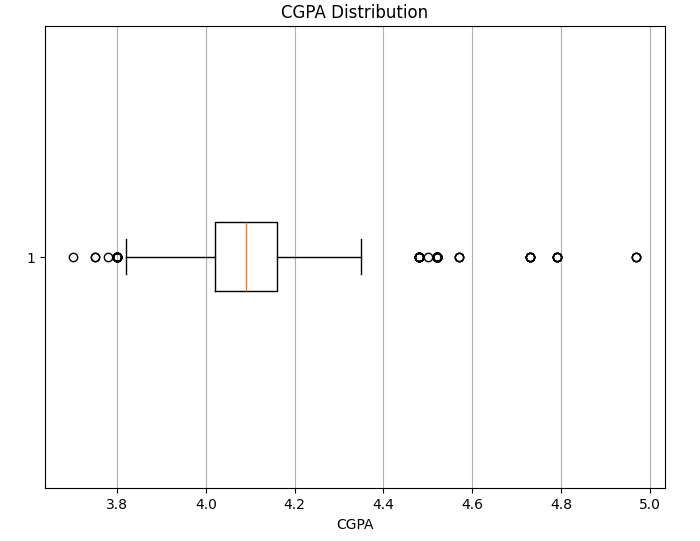

**Problem decomposition**
1. Read and analyse the csv file
2. Organise students into tut groups
3. Define a diversity criteria to ensure school affiliation, gender, and CGPA balance.
4. Create a team formation algroithm which will manage formation of teams of 5, apply diversity check, and handle exceptions.
5. Create a diversity check mechanism which will assess teams on the basis of the defined diversity criteria and also implement tolerance for dominated tut groups.
6. After formation of teams, teams will have to be added to another csv file
7. Successfully created teams need to be tracked and exception cases need to be identified and logged. 

## Algorithm planning

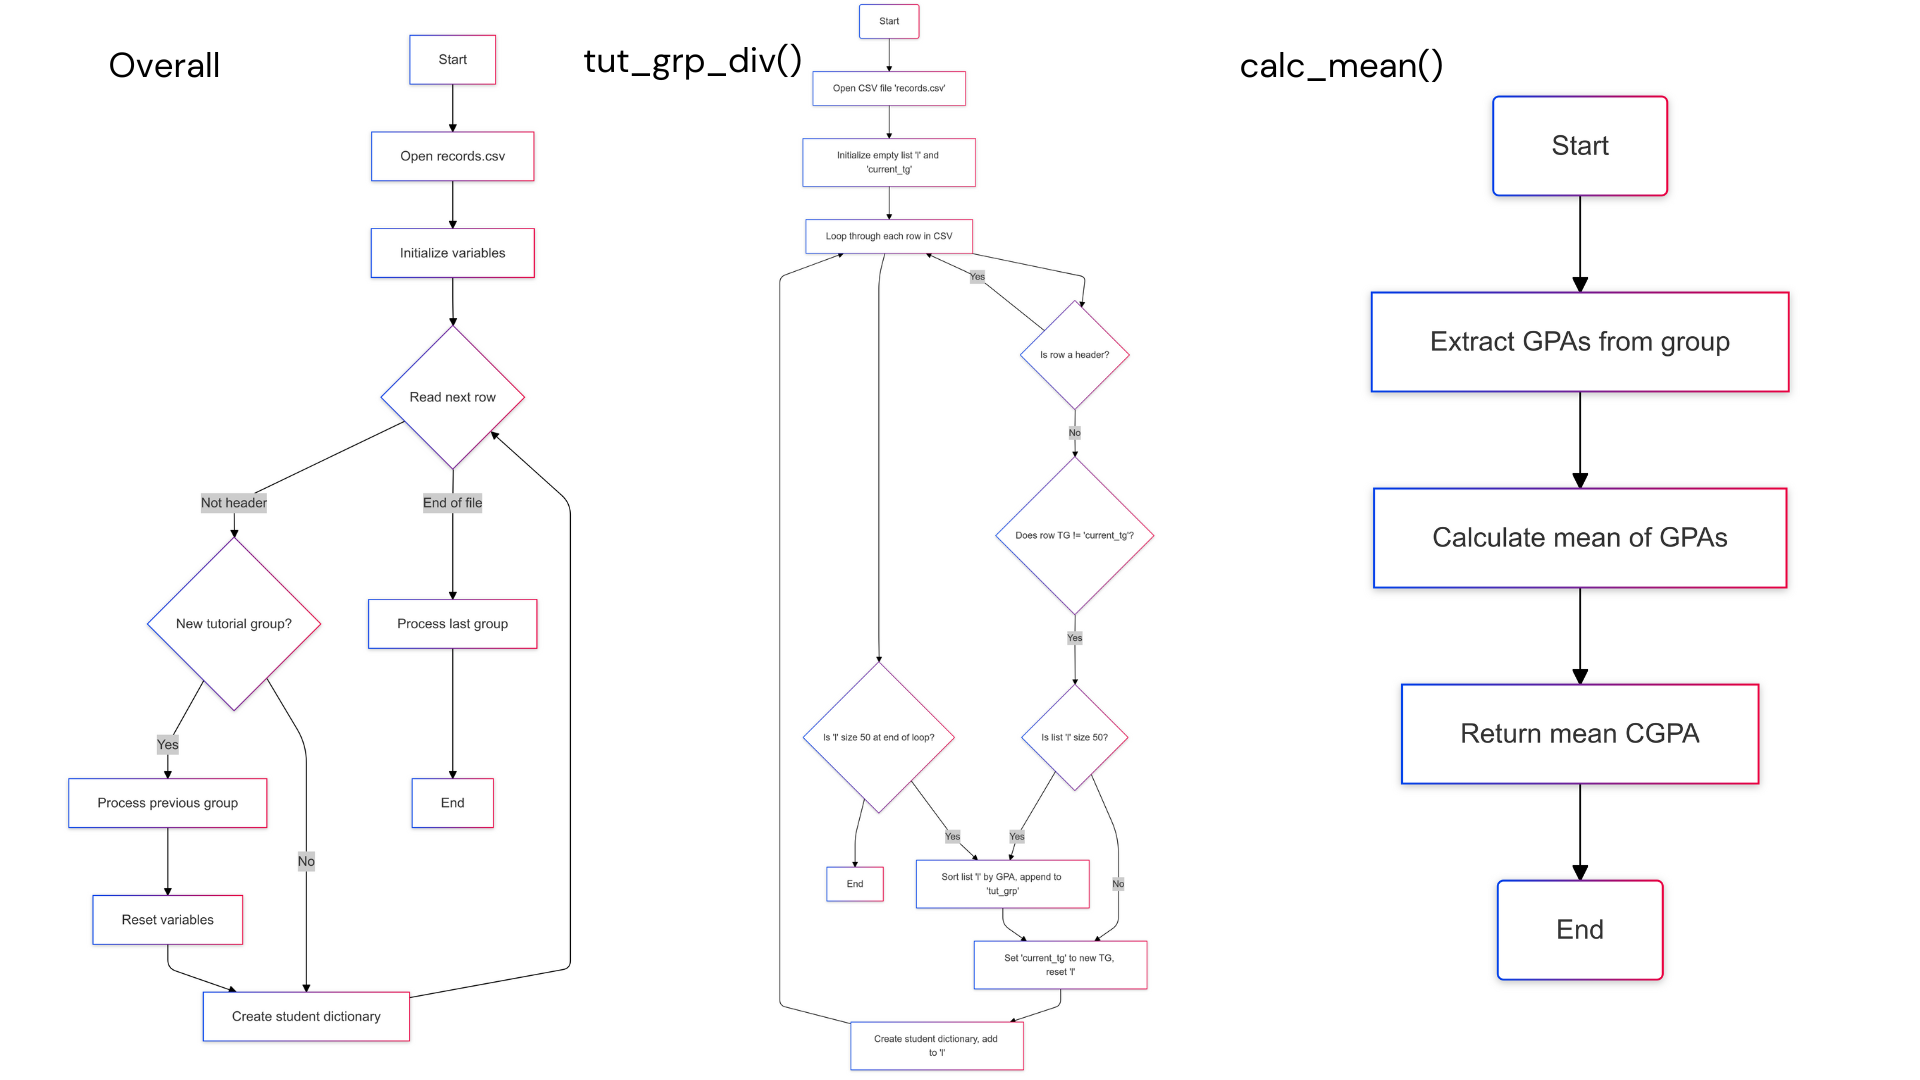
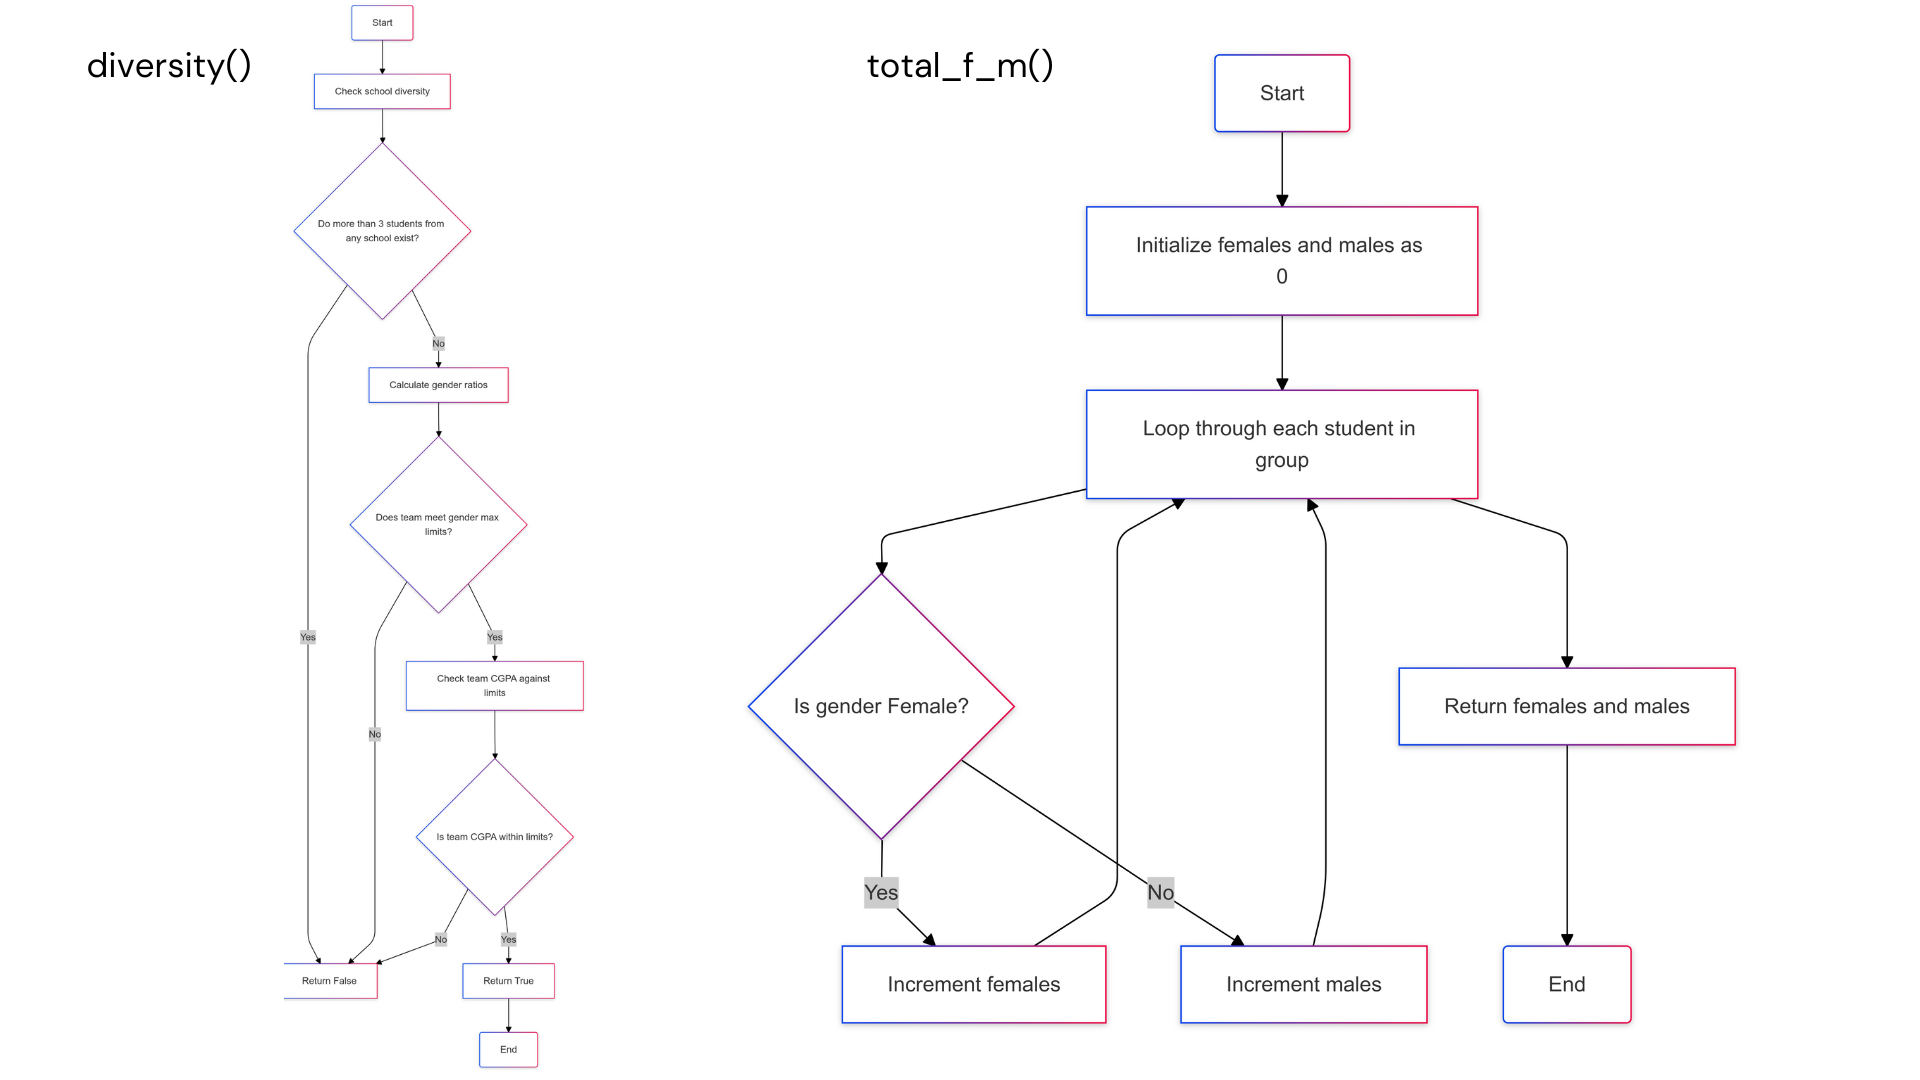
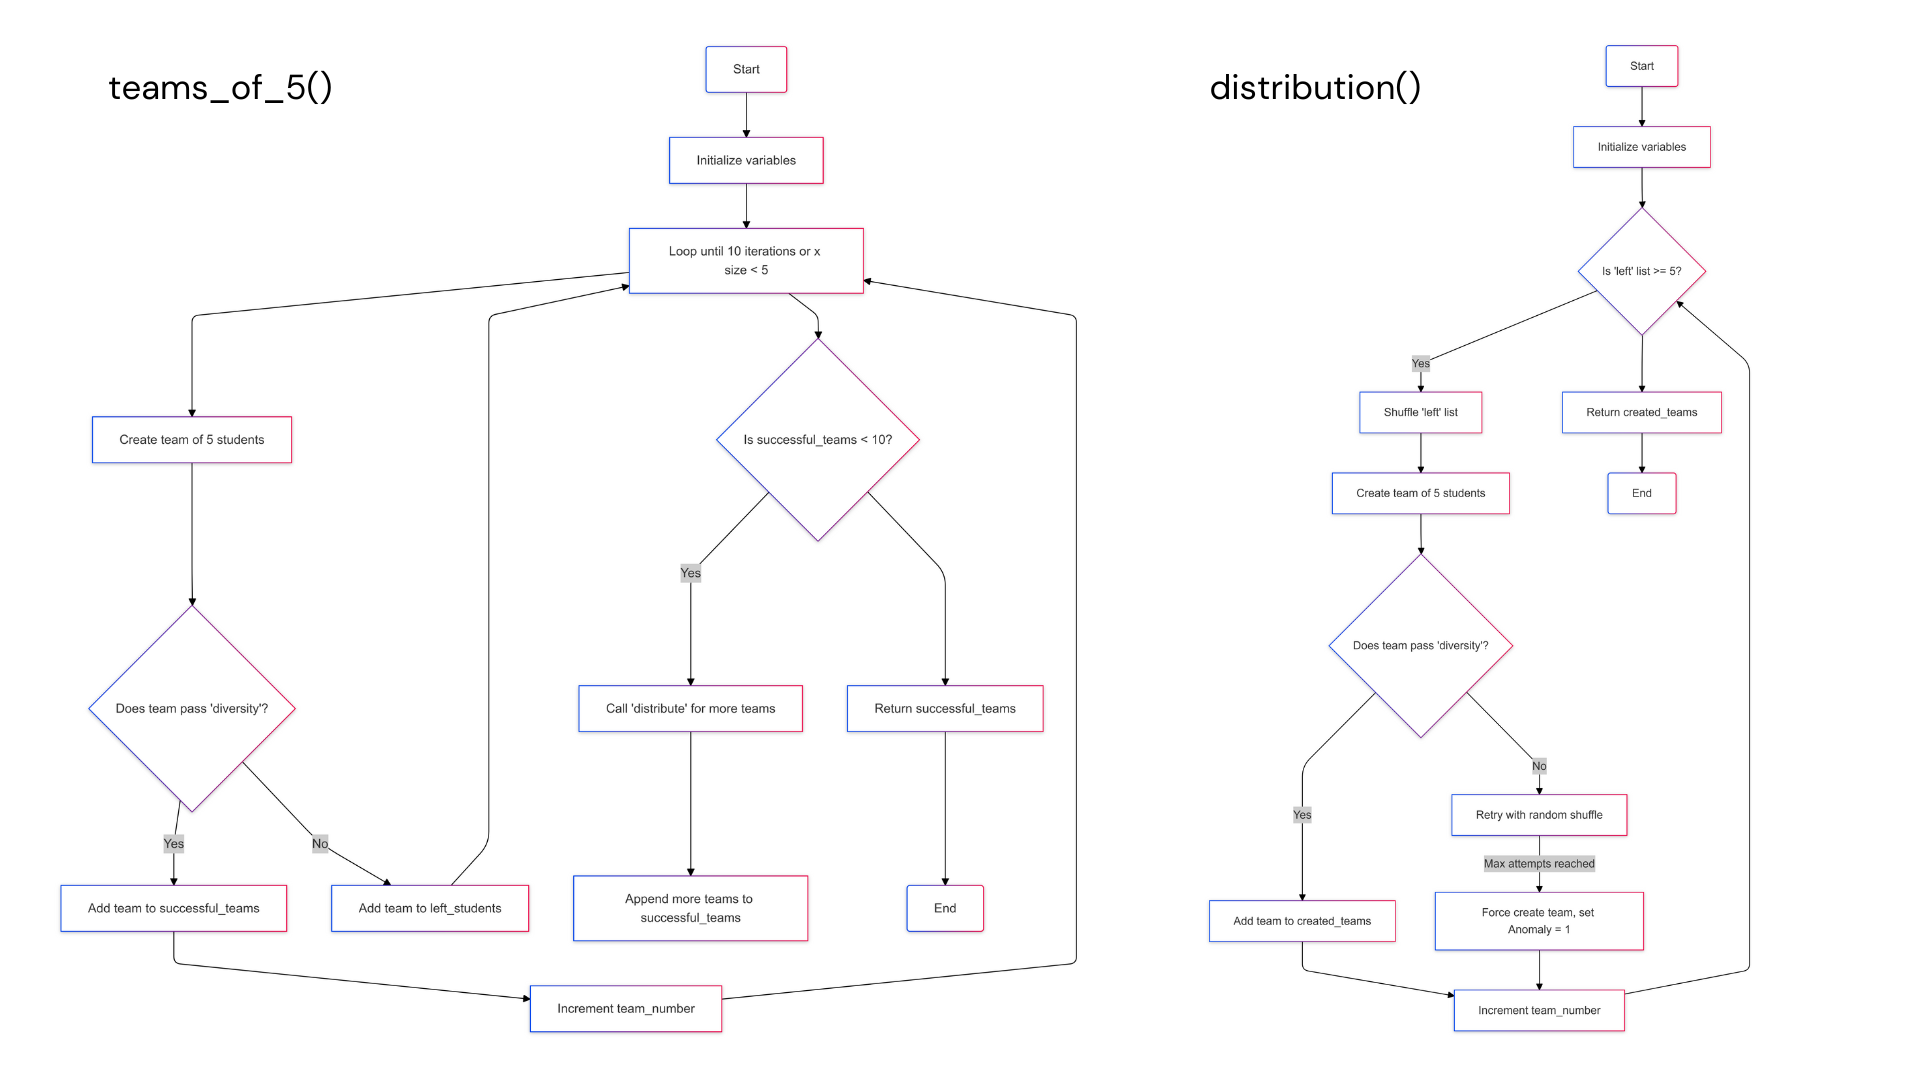
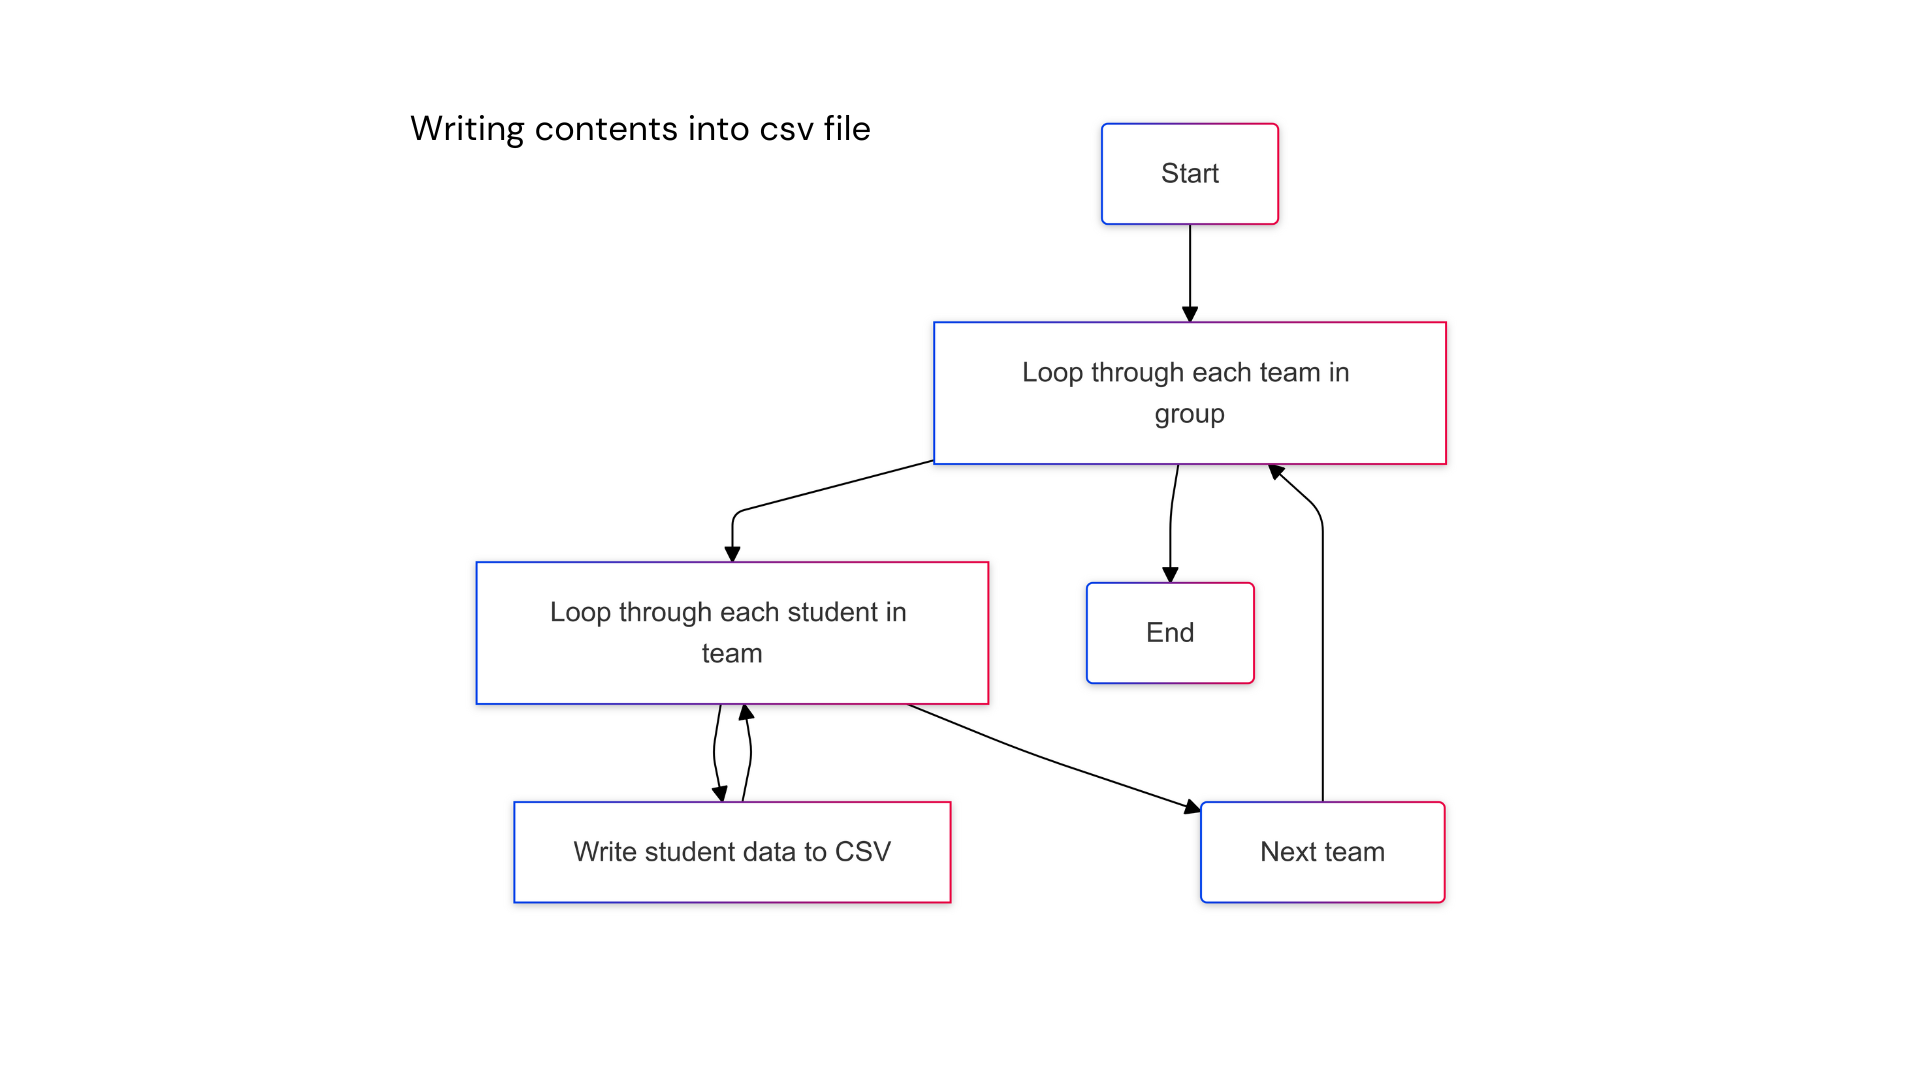

## Pseudocode

## First version of our code

# Analysis of our old code
The formation of anomaly groups occurs when, after multiple attempts to meet diversity standards, it is still not possible to assign students to teams that meet the diversity criteria. Our method for detecting anomaly groups is as follows: if, after running 100 consecutive diversity checks, there are still students who have not been assigned to a team that meets the requirements, the remaining students are then randomly assigned to a team, which is marked as an anomaly group.

1. **School to students distribution:**
Our method for assigning school and gender diversity is structured to ensure that each team includes students from as many different schools as possible.
* From the previous analysis of the overall data, we can see that the distribution across schools for the 6,000 students is highly uneven.
* Therefore, we aimed to ensure that each group of five members includes students from at least three different schools.
* The chart below shows the school distribution within each group, where groups with students from only two or one school are rare.
  
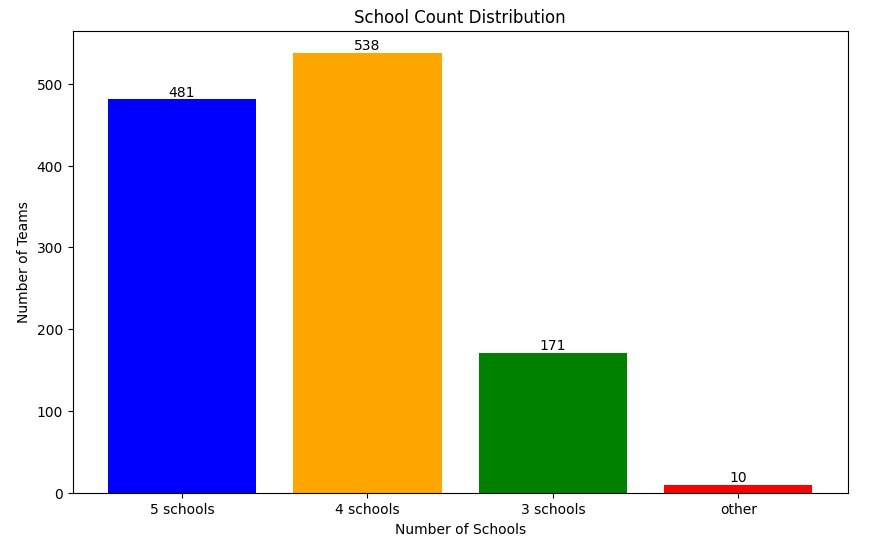

3. **Gender distribution:**
Our appraoch aimed for gender balance in the 5-person groups, maintaining an approximate 3:2 gender ratio.
* We can observe that the gender distribution in our previous version was relatively balanced.
* Approximately 89.6% of teams had a 3:2 gender ratio, totaling 1,075 teams.
* Teams with a 4:1 gender ratio accounted for around 5.2%, or 62 teams, while those with a 5:0 gender ratio made up approximately 5.2%, totaling about 63 teams.

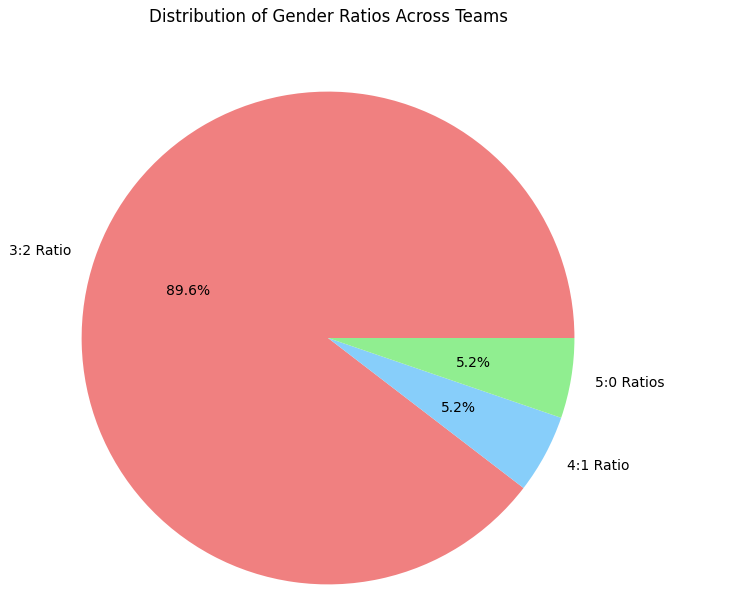

4. **CGPA distribution:**
We developed two strategies to ensure diversity in CGPA distribution within teams.
* The first strategy aims to bring each team's average CGPA close to the overall average of 4.089 for 6,000 students.
* The second strategy ensures that each team’s CGPA standard deviation falls between 0.08 and 0.185, meaning that each team should include students with both high and low CGPAs to enhance diversity.
* The chart below illustrates the number of outlier groups generated by using the two different CGPA distribution methods.
* Different CGPA distribution strategies may lead to imbalances in gender and school representation, thus creating outlier groups. Observations show that the average-based method resulted in 132 outlier groups, while the standard deviation-based method produced 211 outlier groups.
* *Since the average-based CGPA allocation method resulted in the fewest anomaly groups, we have decided to further refine this approach.*
   
   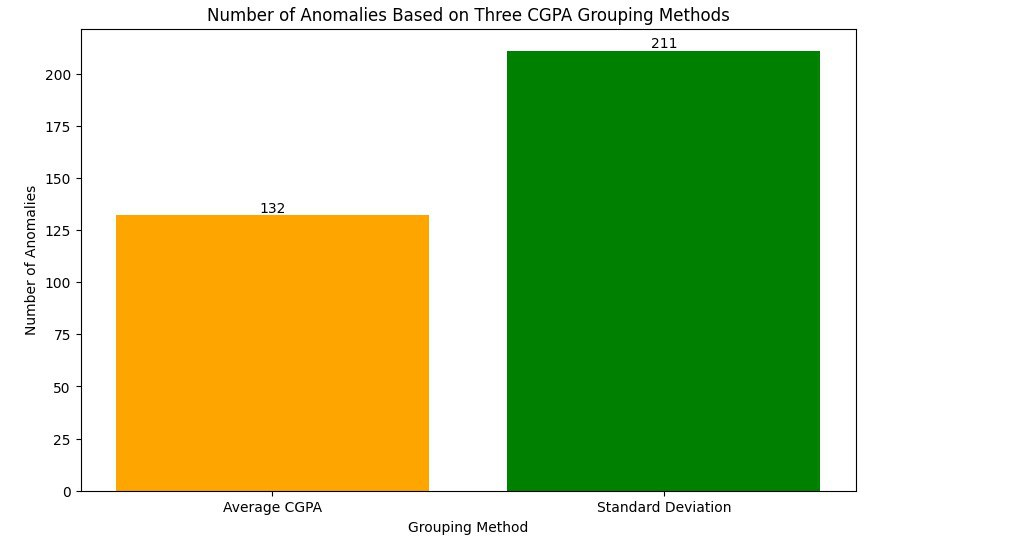

## Our updated version

This section deal with importing modules os and random to handle CSV files operations and suffling lists respectively.
It also gets the current working directory using os.getcwd() and opens a new CSV file named "new_code.csv" in write mode to store the output data.

In [ ]:
#IMPORTED FUNCTIONS
import random
import os

#GET CURRENT DIRECTORY
cwd = os.getcwd()

#OPENING NEW CSV FILE TO WRITE DATA
f2 = open("FCS5_team4_JindalKhanak2.csv", "w", newline = "")

**tut_grp_div()** 

**Old Version**: This section:
* Open & read 'records.csv'.
* Groups students by tutorial group.
* Stores each student's record as a dictionary.
* AAppend each sorted tutorial group to the tut_grp list.

**New Version**
This function reads student records from "records.csv" and organises it into tutorial groups.
1. Open & read 'records.csv'.
2. Split file content into individual student data.
3. Iterates through each student data, making sure to skip any empty lines and the header.
4. Creates a dictionary for each student with their information.
5. Groups students by tutorial group. (Each group has 50 students)
6. ***Sorts students within each tutorial group based on their CGPA.***
7. Append each sorted tutorial group to the tut_grp list.

In [ ]:
#FUNCTIONS
#SORTING STUDENTS BASED ON TUT GROUP
def tut_grp_div():
   #OPENING CSV FILE TO READ DATA
    with open(os.path.join(cwd, 'records.csv'), 'r') as file:
        studentrecords = file.read()

    students = studentrecords.split('\n')
    l = [] #TEMPORARY LIST TO STORE STUDENTS OF ONE TUTORIAL GROUP
    current_tg = None #KEEPING TABS ON THE TUT GRP BEING SORTED

    for i in students:
        i = i.split(',')

        if i[0] == '':
            continue
        if i[0] != "Tutorial Group": # TO IGNORE THE HEADER CONTENT
            if i[0] != current_tg:
                if len(l) == 50: # WHEN ALL 50 STUDENTS FROM A TUT GROUP ARE SORTED, ADDING THEN TO THE MAIN TUT_GRP LIST
                    tut_grp.append(sorted(l, key=lambda x: x["GPA"])) #SORT STUDENTS BASED ON CGPA
                    l = [] #EMPTY TEMP LIST
                current_tg = i[0]

            d = {} #STORING EACH STUDENT RECORD AS A DICTIONARY
            d["TG"] = i[0]
            d["ID"] = i[1]
            d["School"] = i[2]
            d["Name"] = i[3]
            d["Gender"] = i[4]
            d["GPA"] = float(i[5])
            l.append(d)

    if len(l) == 50: # WHEN ALL 50 STUDENTS FROM A TUT GROUP ARE SORTED, ADDING THEN TO THE MAIN TUT_GRP LIST
        tut_grp.append(sorted(l, key=lambda x: x["GPA"])) #SORT STUDENTS BASED ON CGPA

**calc_mean()** function calculates & returns the mean CGPA of a given tutorial group.

*Why was it needed?*
1. To get a reference mean CGPA of the entire tutoiral group for team formation as each tutorial group had a different mean and fixing a strict range of numbers for team formation for all the tut groups wasn't the best approach.
2. This allows for a more dynamic approach to ensuring CGPA diversity within teams.

In [ ]:
#CALCULATING THE MEAN CGPA OF THE ENTIRE TUT GROUP
def calc_mean(grp): 
    cgpas = [student['GPA'] for student in grp]
    mean_cgpa = sum(cgpas)/len(cgpas)
    return mean_cgpa

**total_f_m(grp)** function counts & returns the total number of male and female students within each tutoiral group.  

*Why was it needed?*
1. This fucntion provides information about the gender distribution within each tutoiral group.
2. By knowing the total number of males and females, teh code can calculate the appropriate ratios and set dynmaic limits for gender diversity.

In [ ]:
#CALCULATING THE TOTAL NUMBER OF FEMALES AND MALES IN EACH TUT GROUP
def total_f_m(grp):
    females = 0
    males = 0
    for student in grp:
        if student["Gender"] == "Female":
            females += 1
        else:
            males += 1
    return females, males

**diversity()**

**Old Version**:
* Checks school and gender diversity (max 3 students from same school/gender).
* Checks if average CGPA is between 4 and 4.15.

**New Version**
* This function checks if a team of 5 students meets the diversity criteria based on schools, gender ratios, and GPA.
* Checks school diversity (unchanged).
* Checks gender diversity based on overall tutorial group gender ratio.
* Checks if team's mean CGPA is within a range based on tutorial group's mean CGPA.
* If teams meet the diversity criteria, it returns True, else, False. 

In [ ]:
#CHECK TEAM DIVERSITY IN TERMS OF SCHOOL, CGPA, GENDER
def diversity(schools, gender, cgpa, mean_cgpa, f, m):
    
    #SCHOOL DIVERSITY CHECKING
    for i in schools:
        if schools.count(i) > 3: #A TEAM SHOULD NOT HAVE MORE THAN 3 STUDENTS BELONGING TO THE SAME SCHOOL
            return False

    #GENDER DIVERSITY CHECKING
    female_ratio = f / (f + m) #CALCULATING THE RATIO OF FEMALES IN THE TUT GROUP
    male_ratio = m / (f + m) #CALCULATING THE RATIO OF MALES IN THE TUT GROUP

    max_females = max(4, int(female_ratio * 5) + 1) #ESTIMATING THE MAX NUMBER OF FEMALES PER TEAM
    max_males = max(4, int(male_ratio * 5) + 1) #ESTIMATING THE MAX NUMBER OF MALES PER TEAM

    if gender.count("Female") > max_females or gender.count("Male") > max_males:
        return False

    #CGPA DIVERSITY CHECKING
    mean_cgpa_team = sum(cgpa)/len(cgpa) #CALCULATING THE MEAN CGPA OF THE FORMED TEAM
    bottom_limit = mean_cgpa * 0.5 #ALLOWING CGPA VARIANCE
    top_limit = mean_cgpa * 1.5 #ALLOWING CGPA VARIANCE
    if not (bottom_limit <= mean_cgpa_team <= top_limit):
        return False

    return True

**teams_of_5()** 

**Old Version** 
* Attempts to create 10 teams of 5 students each.
* Uses random shuffling to form teams.
* Checks diversity criteria for each team.
* Marks teams as anomalies if criteria not met after max attempts

**New version**
This function attempts to create teams of 5 students from a tutorial group. 
* It takes additional parameters: mean_cgpa, f, m (female and male counts)
* Uses a left-to-right approach to select students to take students of both high and low cgpa rather than random selection like in the previous code.
* It uses the diversity function to check if each team meets the criteria.
* If a team doesn't meet the criteria, its members are added to a list of left students.
* If less than 10 teams are formed, it calls the distribute function to create teams for the remaining students. 

In [ ]:
#CREATING TEAMS OF 5 
def teams_of_5(x, mean_cgpa, f, m): 
    successful_teams = [] #TEAMS MEETING DIVERSITY CRITERIA LIST
    left_students = [] #STUDENTS WHOSE TEAMS DID NOT MEET DIVERSITY CRITERIA YET
    team_number = 1 #KEEPING TRACK OF ASIGNED TEAM AND TEAM NUMBER

    #ALLOTMENT OF TEAMS BY THE ZIG-ZAG METHOD (OR RIGHT TO LEFT METHOD)
    left, right = 0, len(x) - 1
    team_found = False
    iterations = 0

    while iterations < 10 and len(x) >= 5:
        team = []
        while len(team) < 5 and left <= right:
            team.append(x[left])
            left += 1
            if len(team) < 5 and left <= right:
                team.append(x[right])
                right -= 1

        if len(team) == 5:
            team_found = diversity([d["School"] for d in team], [d["Gender"] for d in team], [d["GPA"] for d in team], mean_cgpa, f, m) #RUNNING DIVERSITY CHECK

            #ON MEETING DIVERSITY CRITERIA
            if team_found:
                for student in team:
                    student["Team Assigned"] = team_number #ASSIGN TEAM NUMBER
                    student["Anomaly"] = 0 #MARK THEM AS NOT AN ANOMALY
                team_number += 1 
                successful_teams.append(team)
                team = []

            #IF IT FAILS TO MEET THE DIVERSITY CRITERIA
            else: 
                for student in team:
                    left_students.append(student)

            iterations += 1

    #SINCE THERE ARE 50 STUDENTS PER TUT GROUP, 10 TEAMS OF 5 NEED TO BE FORMED.
    if len(successful_teams) < 10:
        more_teams = distribute(left_students, mean_grp, team_number) #RUN DISTRIBUTE FUNCTION TO FORM TEAMS
        for team in more_teams:
            successful_teams.append(team)

    return successful_teams

**distribute()** function handles the remaining students who couldn't be placed in teams by the teams_of_5 function.
* It randomly shuffles the students and attempts to create diverse teams.
* If a diverse team can't be formed after multiple attempts, it creates a team and marks it as an anomaly.

*Why was it needed?*
* To handle students who were not placed in any team as their team failed the diveristy criteria.
* This provides a mechanism to continue diversity efforts for remaining students.

In [ ]:
def distribute(left, mean_grp, team_number):
    created_teams = [] #SUCCESSFULLY FORMED TEAMS
    max_attempts = 100 # TO AVOID INFINITE LOOP SITUTAION
    attempts = 0

    while len(left) >= 5:
        team_found = False

        while attempts < max_attempts:
            random.shuffle(left) #SHUFFLE TUT GROUP STUDENTS INTO A RANDOM ORDER

            team = left[:5] #CREATING A TEAM OF 5 INITIAL STUDENTS

            team_found = diversity([d["School"] for d in team], [d["Gender"] for d in team], [d["GPA"] for d in team], mean_grp, f, m) #RUNNING DIVERSITY CHECK

            #IF TEAM METS DIVERSITY CRITERIA:
            if team_found:
                for student in team:
                    student["Team Assigned"] = team_number#ASSIGN TEAM NUMBER
                    student["Anomaly"] = 0 #MARK THEM AS NOT AN ANOMALY
                team_number += 1
                created_teams.append(team)

                team = []
                left = left[5:] #REMOVE INITIAL 5 STUDENTS FRON THE LEFT STUDENTS LIST
                break
            attempts += 1

        #NOT MEETING DIVERSITY CRITERIA
        else:
            team = left[:5] #CREATE A TEAM FO 5 INITIAL STUDENTS
            for student in team:
                    student["Team Assigned"] = team_number
                    student["Anomaly"] = 1 #MARK THEM AS ANOMALY
            team_number += 1
            created_teams.append(team)
            left = left[5:]

    return created_teams

* **write_csv()** function writes the team information to the output CSV file.

In [ ]:
#WRITING CONETNT TO ANOTHER FILE WITH ASSIGNED TEAMS
def write_csv(grp):
    for team in grp:
        for student in team:
            row = (f"{student['TG']},{student['ID']},{student['School']},{student['Name']},{student['Gender']},{student['GPA']},{student['Team Assigned']},{student['Anomaly']}\n")
            f2.write(row)

tut_grp = [] #DIVIDING STUDENTS ON THE BASIS OF TUT GROUPS
tut_grp_div()
anomalies = 0

header = (f"TG,ID,School,Name,Gender,GPA,Team Assigned\n")
f2.write(header)

43

* The main part of the script initializes the tut_grp list, calls the tut_grp_div() function to populate it, writes the CSV header, and then processes each tutorial group to create teams.
* It keeps track of the number of anomalies (teams that don't meet the diversity criteria) and prints the ratio of anomalies to total teams at the end.

In [ ]:
#MAIN EXECUTION
for i in tut_grp: #DIVISION OF TEAMS
    mean_grp = calc_mean(i)
    f, m = total_f_m(i)
    grp = teams_of_5(i, mean_grp, f, m)
    for team in grp:
        for student in team:
            if student["Anomaly"] == 1:
                anomalies += 1
    write_csv(grp)

print("The total number of anomalies are: ", anomalies/5)
f2.close()

The total number of anomalies are:  61.0


# Analysis of our updated code
1. **School to student distribution**
* In the latest version, our method for school distribution remains unchanged.
* As shown in the chart below, the blue bars on the right represent the distribution in the old version, while the red bars on the right represent the distribution in the new version.
  
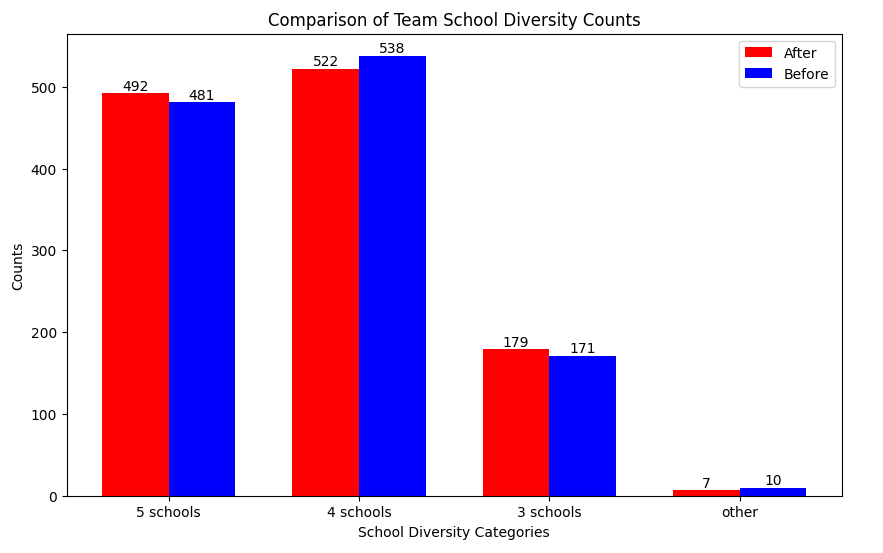

2. **Gender distribution**
* To improve the algorithm based on average CGPA, we allowed some flexibility for gender diversity, permitting a small number of teams with a 4:1 gender ratio while aiming to avoid a 5:0 ratio.
* As shown in the chart, there are 762 teams with a 3:2 gender ratio, 377 teams with a 4:1 ratio, and only 61 teams with a 5:0 ratio.
  
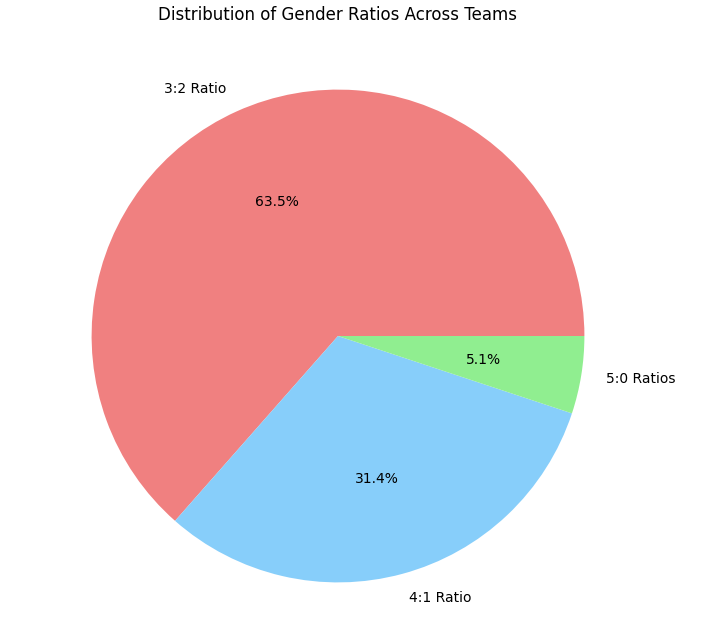

3. **CGPA distribution**
* This table displays the average CGPA for each tutorial group (second column) along with the average CGPA for each of the 10 teams within each tutorial group (columns three through twelve).
* The first column represents the tutorial group
* The second column represents the avg cgpa of that tutorial group
* The columns 3-12 represent the avg cgpa of each team formed
  
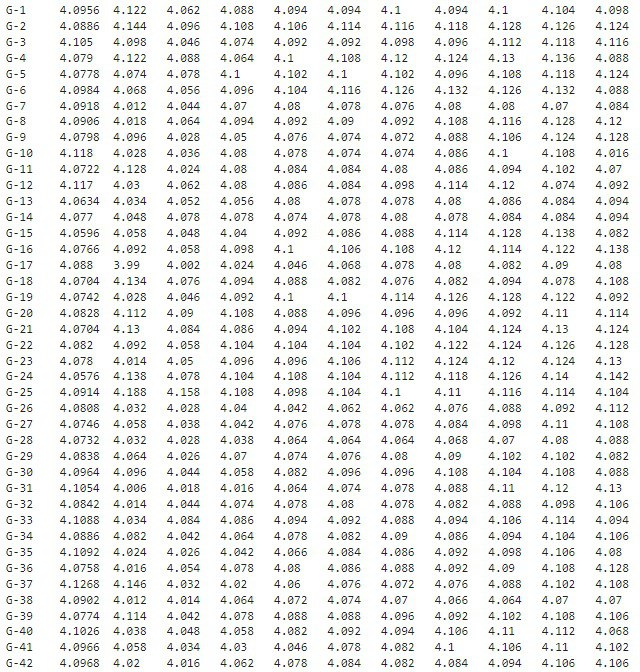
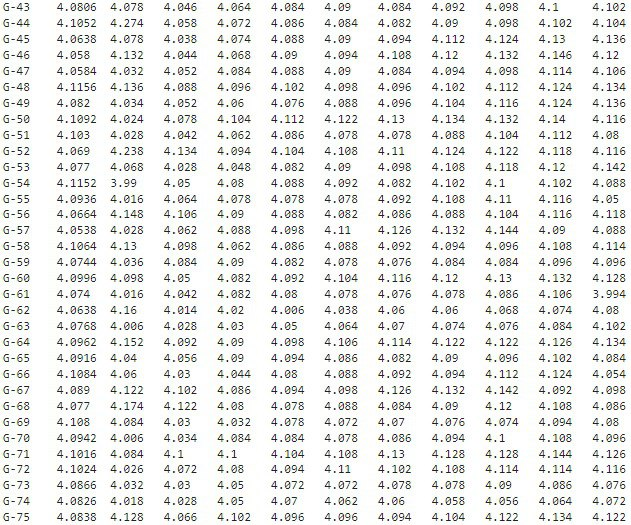
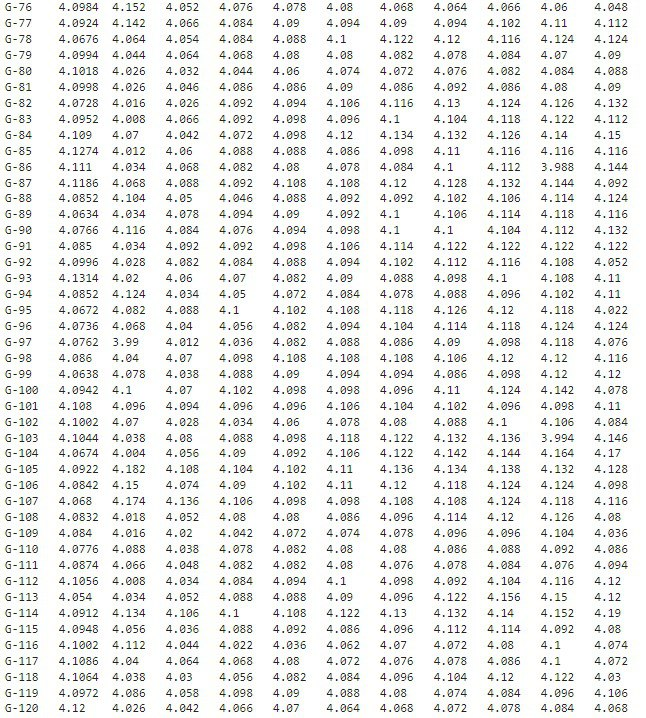

* To provide a more intuitive demonstration of our algorithm's effectiveness, we selected two tutorial groups from a complex data table and plotted two line charts.
* The X-axis represents the 10 teams within a tutorial group, and the Y-axis represents their average CGPA, with the red line indicating the tutorial group's average CGPA.
* As shown, each point is relatively close to the average, with distances from the average at 0.0092 and 0.0251, respectively. This indicates that the grouping is both reasonable and fair.

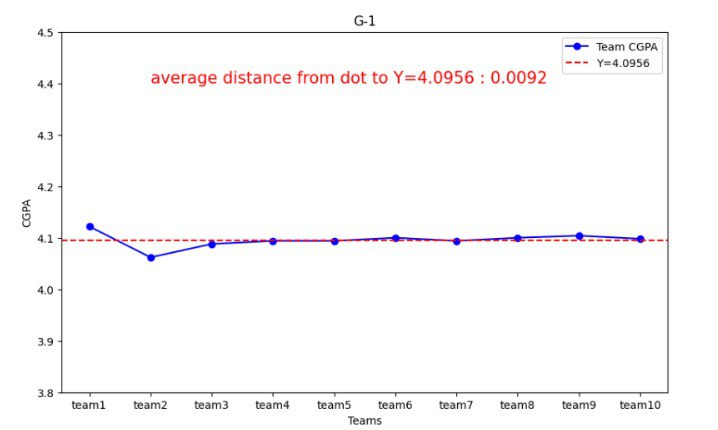
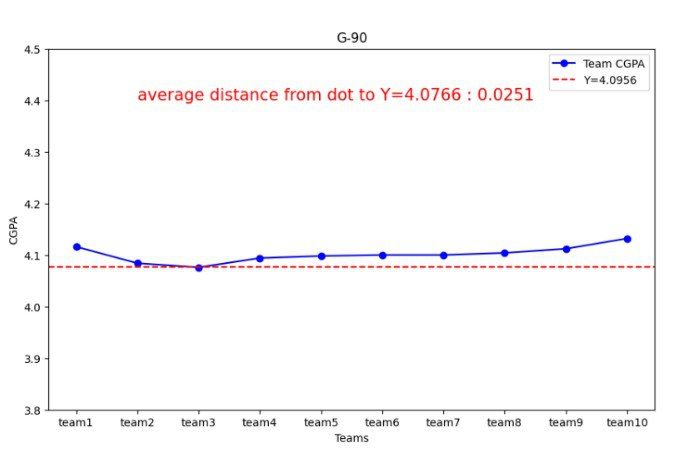


  
* The line chart below shows 100 randomly selected teams from both the old and new allocation lists. 
* The X-axis represents these randomly selected teams, while the Y-axis shows the average CGPA of each team.
* The red dashed line represents the overall average CGPA of 6,000 students.
* The blue line represents the 100 randomly selected teams from the old version, and the green line represents the 100 randomly selected teams from the new version.
* We can see that the points on the blue line are further from the red average line, while the green line is closer to the average, indicating a fairer distribution in the new version.
* Additionally, the blue line almost encircles the green line, showing that in the new version, each team’s average CGPA is closer to the overall mean.
* The green line is also smoother compared to the blue line, suggesting that in the new version, each tutorial group has a more balanced team level, with no teams having particularly high or low CGPAs.
  
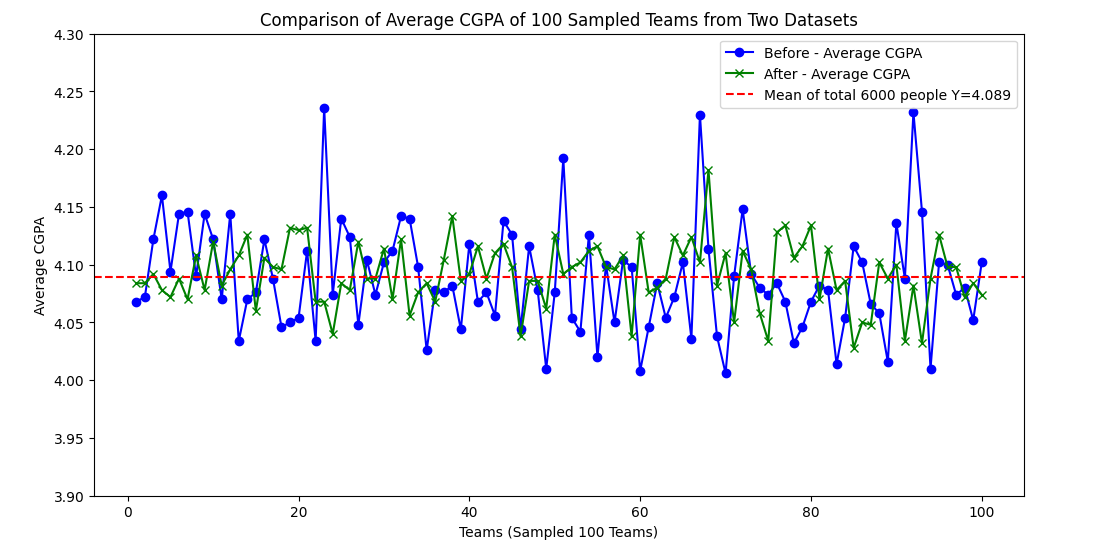

# Thank You

## Tools and Resources

1. **ChatGPT**: Used for debugging and grammar checks.
2. **Canva**: Used for creating images and visual elements.